# Simsets: Simflix

Pull a random Simflix viewing dataset from the simflix endpoint

In [83]:
# Get json from url
import requests
import json
import pandas as pd
import matplotlib, numpy as np, pandas as pd, matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
import plotly.express as px


url = "http://www.simsets.co.uk/simflix?output_type=json&num_movies=100"
response = requests.get(url)
response_json = response.json()
as_json = json.loads(response_json['viewing'])
viewing_df = pd.DataFrame(as_json['data'])
viewing_df.columns = as_json['columns']
viewing_df.head()

,viewer_id,viewer_name,crucial tough guy in the line of fire V,galactic space zebra invasion II,evil zombie from outer space,unstoppable cop mission IV,cosmic space zebra from outer space,luxury over ecstacy V,loaded cop in the line of fire IV,mutant zombie attack on Mars II,...,blood thirsty space zebra invasion IV,obstinacy and prejudice,luxury and paradise V,ultimate weapon mission V,pride and ecstacy II,bad tough guy mission V,bad cop in the line of fire,fatal tough guy death wish III,metalic space zebra attack on Mars IV,indolence and ecstacy II
0,0,Jessica Smith,0,0,0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,0,0
1,1,Michael Short,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,David Mccoy,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,Regina Santiago,0,0,1,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
4,4,Julie Perez,0,1,0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,1,0


## Use PCA as a first attempt to uncover latent structure in the data

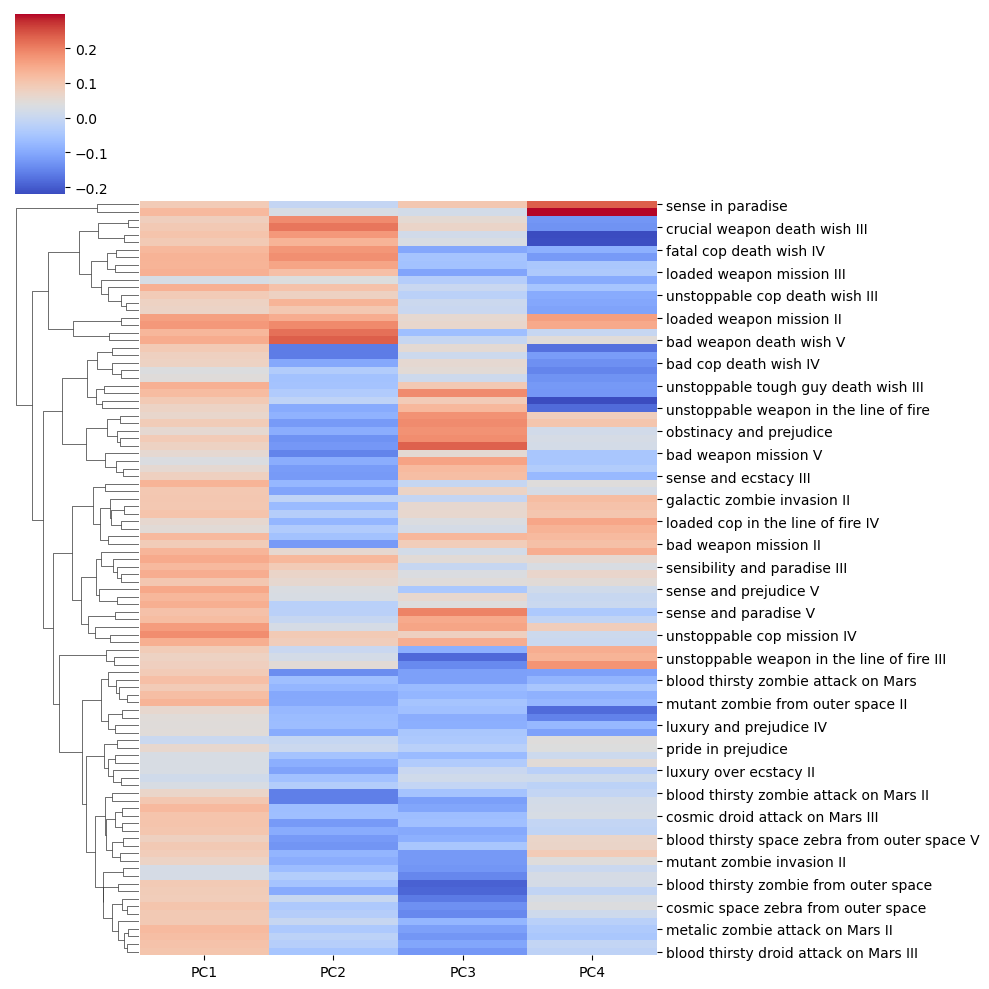

In [84]:
# Do PCA on the data and plot a heatmap of the loadings

from sklearn.decomposition import PCA
import seaborn as sns

scaler = StandardScaler()
viewing_df_scaled = scaler.fit_transform(viewing_df.drop(['viewer_id', 'viewer_name'], axis=1))
pca = PCA(n_components=4)
pca.fit(viewing_df_scaled)
loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2', 'PC3', 'PC4'], index=viewing_df.columns[2:])
_ = sns.clustermap(loadings, cmap='coolwarm', col_cluster=False)
